In [1]:
import numpy as np
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers.recurrent import SimpleRNN, LSTM, GRU
from keras.optimizers import SGD, Adam
from keras.layers.wrappers import TimeDistributed, Bidirectional
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [2]:
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot

In [5]:
N_OUTPUT = 192 * 2  # Number of Gesture Feature (position + velocity)

EPOCHS = 120
DATA_DIR = './data'
N_INPUT = 26  # Number of input features

BATCH_SIZE = 2056
N_HIDDEN = 256

N_CONTEXT = 60 + 1  # The number of frames in the context

In [6]:
# Get the data
X = np.load(DATA_DIR + '/X_train.npy')
Y = np.load(DATA_DIR + '/Y_train.npy')

In [7]:
print(X.shape, Y.shape)

(229968, 61, 26) (229968, 384)


In [8]:
N_train = int(len(X)*0.9)
N_validation = len(X) - N_train

In [9]:
# Split on training and validation
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=N_validation)

In [11]:
# Define Keras model

model = Sequential()
model.add(TimeDistributed(Dense(N_HIDDEN), input_shape=(N_CONTEXT, N_INPUT)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(TimeDistributed(Dense(N_HIDDEN)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(TimeDistributed(Dense(N_HIDDEN)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(GRU(N_HIDDEN, return_sequences=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Dense(N_OUTPUT))
model.add(Activation('linear'))

In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_4 (TimeDist (None, 61, 256)           6912      
_________________________________________________________________
batch_normalization_5 (Batch (None, 61, 256)           1024      
_________________________________________________________________
activation_6 (Activation)    (None, 61, 256)           0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 61, 256)           0         
_________________________________________________________________
time_distributed_5 (TimeDist (None, 61, 256)           65792     
_________________________________________________________________
batch_normalization_6 (Batch (None, 61, 256)           1024      
_________________________________________________________________
activation_7 (Activation)    (None, 61, 256)          

In [13]:
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss='mean_squared_error', optimizer=optimizer)

In [14]:
hist = model.fit(X_train,
                 Y_train,
                 batch_size=BATCH_SIZE,
                 epochs=EPOCHS,
                 validation_data=(X_validation, Y_validation))



Train on 206971 samples, validate on 22997 samples
Epoch 1/120
206971/206971 [==============================] - 17s 84us/step - loss: 566.5158 - val_loss: 392.4154
Epoch 2/120
206971/206971 [==============================] - 16s 80us/step - loss: 273.1686 - val_loss: 144.5669
Epoch 3/120
206971/206971 [==============================] - 16s 79us/step - loss: 96.3290 - val_loss: 50.6729
Epoch 4/120
206971/206971 [==============================] - 16s 79us/step - loss: 40.0310 - val_loss: 31.0936
Epoch 5/120
206971/206971 [==============================] - 16s 79us/step - loss: 29.2517 - val_loss: 26.6001
Epoch 6/120
206971/206971 [==============================] - 16s 80us/step - loss: 26.2494 - val_loss: 24.9608
Epoch 7/120
206971/206971 [==============================] - 17s 80us/step - loss: 24.8027 - val_loss: 23.5973
Epoch 8/120
206971/206971 [==============================] - 16s 80us/step - loss: 23.7121 - val_loss: 22.7740
Epoch 9/120
206971/206971 [=============================

In [15]:
model.save('./models/baseline_model.hdf5')

In [17]:
%matplotlib inline 

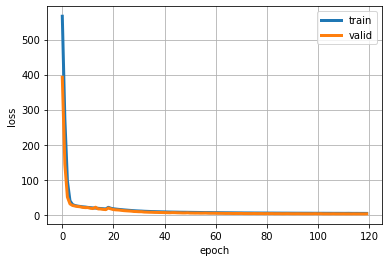

In [18]:
pyplot.plot(hist.history['loss'], linewidth=3, label='train')
pyplot.plot(hist.history['val_loss'], linewidth=3, label='valid')
pyplot.grid()
pyplot.legend()
pyplot.xlabel('epoch')
pyplot.ylabel('loss')
pyplot.show()